
## General Introduction

The goal of this project is to analyze the database to find out the rental trends those days and get a clear understanding of users' behaviour. I collected the database from a video <a href="https://youtu.be/r-uOLxNrNk8">Data Analysis with Python - Full Course for Beginners (Numpy, Pandas, Matplotlib, Seaborn)</a> of freeCodeCamp.org channel. While working through this database, I would show my data analysis skills in Python. Therefore, all the code lines and analysis below are result of my work assuredly.

## The Sakila Database

The <a href="https://dev.mysql.com/doc/sakila/en/">Sakila Database</a> is a nicely normalised schema modelling a DVD rental store, featuring things like films, actors, film-actor relationships, and a central inventory table that connects films, stores, and rentals. It was originally created by MySQL and has been open sourced under the terms of the BSD License.

<img width="1200px" src="https://user-images.githubusercontent.com/7065401/58504872-fa243b00-8161-11e9-85ed-4b7d8d7ce9f7.png" />

## Get started!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

%matplotlib inline

## Import data

In [2]:
connect_data = sqlite3.connect('data/sakila.db')

data = pd.read_sql('''
    SELECT
        rental.rental_id, rental.rental_date, rental.return_date,
        customer.customer_id, customer.first_name AS customer_firstname,
        customer.last_name AS customer_lastname,
        store.store_id,
        city.city AS rental_store_city,
        film.title AS film_title, film.rental_duration AS film_rental_duration,
        payment.amount AS payment_amount,
        film.rental_rate AS film_rental_rate, film.replacement_cost AS film_replacement_cost,
        film.rating AS film_rating, category.name AS category    
    FROM rental
    INNER JOIN customer ON rental.customer_id == customer.customer_id
    INNER JOIN inventory ON rental.inventory_id == inventory.inventory_id
    INNER JOIN store ON inventory.store_id == store.store_id
    INNER JOIN address ON store.address_id == address.address_id
    INNER JOIN city ON address.city_id == city.city_id
    INNER JOIN film ON inventory.film_id == film.film_id
    INNER JOIN film_category ON film.film_id == film_category.film_id
    INNER JOIN category ON film_category.category_id == category.category_id
    INNER JOIN payment ON rental.rental_id == payment.rental_id
    ;
''', connect_data, index_col='rental_id', parse_dates=['rental_date', 'return_date'])

## Take a overview at data

In [3]:
data.head()

,rental_date,return_date,customer_id,customer_firstname,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,payment_amount,film_rental_rate,film_replacement_cost,film_rating,category
rental_id,,,,,,,,,,,,,,
76,2005-05-25 11:30:37,2005-06-03 12:00:37,1,MARY,SMITH,2,Woodridge,PATIENT SISTER,7,2.99,0.99,29.99,NC-17,Classics
573,2005-05-28 10:35:23,2005-06-03 06:32:23,1,MARY,SMITH,2,Woodridge,TALENTED HOMICIDE,6,0.99,0.99,9.99,PG,Sports
1185,2005-06-15 00:54:12,2005-06-23 02:42:12,1,MARY,SMITH,1,Lethbridge,MUSKETEERS WAIT,7,5.99,4.99,17.99,PG,Classics
1422,2005-06-15 18:02:53,2005-06-19 15:54:53,1,MARY,SMITH,2,Woodridge,DETECTIVE VISION,4,0.99,0.99,16.99,PG-13,Classics
1476,2005-06-15 21:08:46,2005-06-25 02:26:46,1,MARY,SMITH,1,Lethbridge,FERRIS MOTHER,3,9.99,2.99,13.99,PG,Comedy


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16044 entries, 76 to 15725
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   rental_date            16044 non-null  datetime64[ns]
 1   return_date            15861 non-null  datetime64[ns]
 2   customer_id            16044 non-null  int64         
 3   customer_firstname     16044 non-null  object        
 4   customer_lastname      16044 non-null  object        
 5   store_id               16044 non-null  int64         
 6   rental_store_city      16044 non-null  object        
 7   film_title             16044 non-null  object        
 8   film_rental_duration   16044 non-null  int64         
 9   payment_amount         16044 non-null  float64       
 10  film_rental_rate       16044 non-null  float64       
 11  film_replacement_cost  16044 non-null  float64       
 12  film_rating            16044 non-null  object        
 13  

In [5]:
data.shape

(16044, 14)

In [6]:
data.describe()

,customer_id,store_id,film_rental_duration,payment_amount,film_rental_rate,film_replacement_cost
count,16044.000000,16044.000000,16044.00000,16044.000000,16044.000000,16044.000000
mean,297.143169,1.506171,4.93549,4.201356,2.942630,20.215443
std,172.453136,0.499978,1.40169,2.362961,1.649678,6.081771
min,1.000000,1.000000,3.00000,0.000000,0.990000,9.990000
25%,148.000000,1.000000,4.00000,2.990000,0.990000,14.990000
50%,296.000000,2.000000,5.00000,3.990000,2.990000,20.990000
75%,446.000000,2.000000,6.00000,4.990000,4.990000,25.990000
max,599.000000,2.000000,7.00000,11.990000,4.990000,29.990000


## Inspect and clean data

In [7]:
data.duplicated().sum()

0

In [8]:
data[data["return_date"].isnull()]

,rental_date,return_date,customer_id,customer_firstname,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,payment_amount,film_rental_rate,film_replacement_cost,film_rating,category
rental_id,,,,,,,,,,,,,,
13209,2006-02-14 15:16:03,NaT,5,ELIZABETH,BROWN,2,Woodridge,GABLES METROPOLIS,3,0.99,0.99,17.99,PG,Family
15813,2006-02-14 15:16:03,NaT,9,MARGARET,MOORE,1,Lethbridge,DEEP CRUSADE,6,4.99,4.99,20.99,PG-13,Documentary
11646,2006-02-14 15:16:03,NaT,11,LISA,ANDERSON,2,Woodridge,BULL SHAWSHANK,6,0.99,0.99,21.99,NC-17,Action
13780,2006-02-14 15:16:03,NaT,14,BETTY,WHITE,2,Woodridge,GROUNDHOG UNCUT,6,4.99,4.99,26.99,PG-13,Comedy
13798,2006-02-14 15:16:03,NaT,15,HELEN,HARRIS,1,Lethbridge,CANDIDATE PERDITION,4,3.98,2.99,10.99,R,Classics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12144,2006-02-14 15:16:03,NaT,587,SERGIO,STANFIELD,1,Lethbridge,CAMELOT VACATION,3,0.99,0.99,26.99,NC-17,Sci-Fi
15458,2006-02-14 15:16:03,NaT,590,SETH,HANNON,2,Woodridge,AFRICAN EGG,6,2.99,2.99,22.99,G,Family
14606,2006-02-14 15:16:03,NaT,592,TERRANCE,ROUSH,2,Woodridge,KICK SAVANNAH,3,0.99,0.99,10.99,PG-13,Travel


Remove the rows containing null in return_date column

In [9]:
data.dropna(how="any", inplace = True)
data.shape

(15861, 14)

# Start analysis
## The growth of rental market

In [10]:
data["rental_date"].max(), data["rental_date"].min()

(Timestamp('2005-08-23 22:50:12'), Timestamp('2005-05-24 22:53:30'))

In [11]:
data["rental_date"].value_counts().sort_values()

2005-07-07 14:38:33    1
2005-08-02 07:41:41    1
2005-08-02 10:43:48    1
2005-08-02 13:44:53    1
2005-08-17 03:52:18    1
                      ..
2005-05-30 14:47:31    2
2005-07-28 15:35:41    2
2005-06-21 09:04:50    2
2005-08-23 08:48:43    2
2005-08-20 09:35:20    2
Name: rental_date, Length: 15813, dtype: int64

In [12]:
data.tail()

,rental_date,return_date,customer_id,customer_firstname,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,payment_amount,film_rental_rate,film_replacement_cost,film_rating,category
rental_id,,,,,,,,,,,,,,
14599,2005-08-21 17:43:42,2005-08-22 18:53:42,599,AUSTIN,CINTRON,1,Lethbridge,ZORRO ARK,3,4.99,4.99,18.99,NC-17,Comedy
14719,2005-08-21 21:41:57,2005-08-25 20:37:57,599,AUSTIN,CINTRON,2,Woodridge,TIMBERLAND SKY,3,1.99,0.99,13.99,G,Classics
15590,2005-08-23 06:09:44,2005-09-01 06:53:44,599,AUSTIN,CINTRON,2,Woodridge,TEMPLE ATTRACTION,5,8.99,4.99,13.99,PG,Horror
15719,2005-08-23 11:08:46,2005-08-25 07:25:46,599,AUSTIN,CINTRON,2,Woodridge,SUSPECTS QUILLS,4,2.99,2.99,22.99,PG,Action
15725,2005-08-23 11:25:00,2005-08-26 11:46:00,599,AUSTIN,CINTRON,2,Woodridge,BLUES INSTINCT,5,2.99,2.99,18.99,G,Family


In [13]:
data["rental_date"] = data["rental_date"].dt.date
data["rental_date"]

rental_id
76       2005-05-25
573      2005-05-28
1185     2005-06-15
1422     2005-06-15
1476     2005-06-15
            ...    
14599    2005-08-21
14719    2005-08-21
15590    2005-08-23
15719    2005-08-23
15725    2005-08-23
Name: rental_date, Length: 15861, dtype: object

<Axes: >

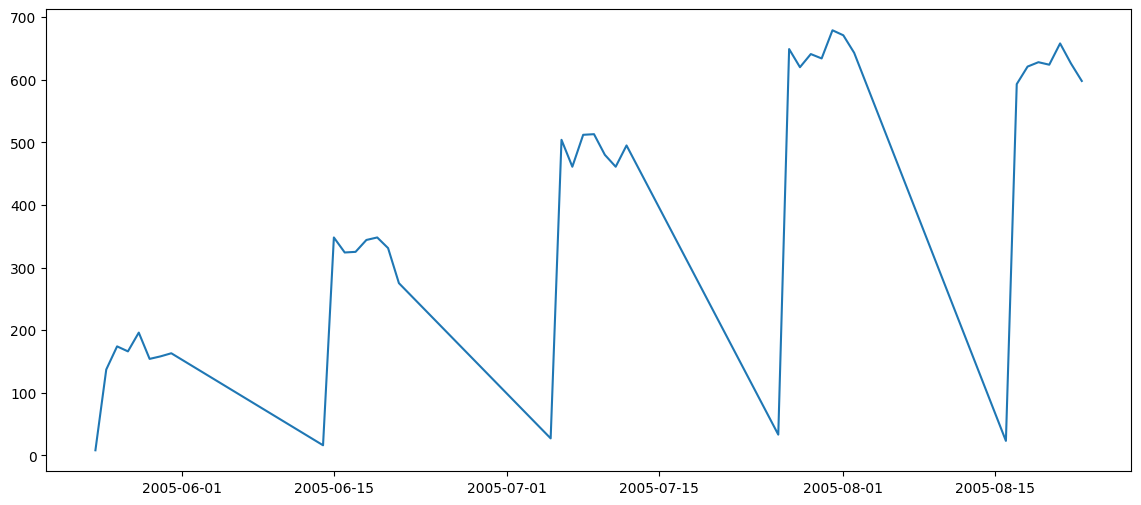

In [14]:
data['rental_date'].value_counts().plot(figsize=(14,6))

<Axes: >

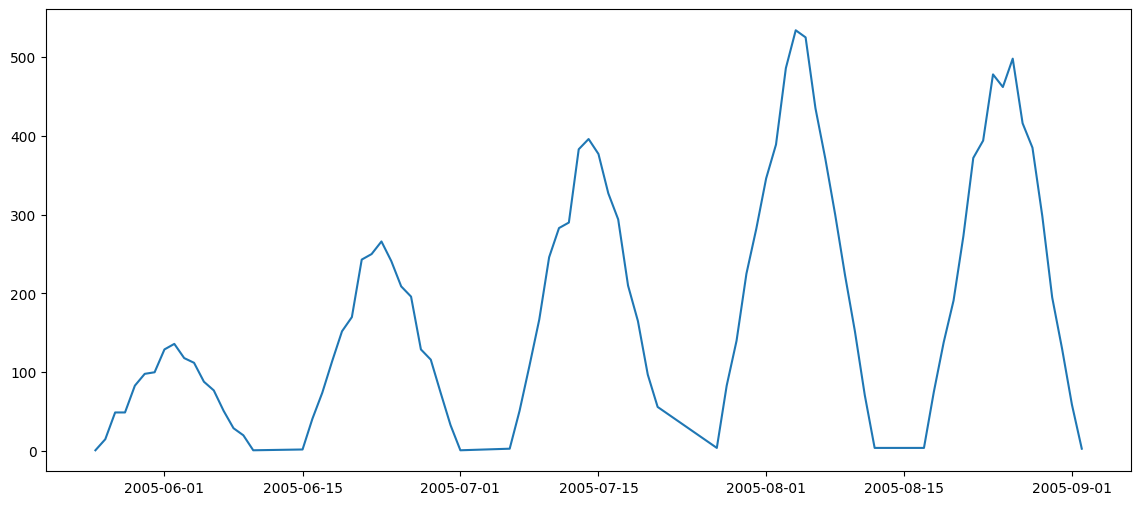

In [15]:
data["return_date"] = data["return_date"].dt.date
data["return_date"].value_counts().plot(figsize=(14,6))

<Axes: xlabel='rental_date'>

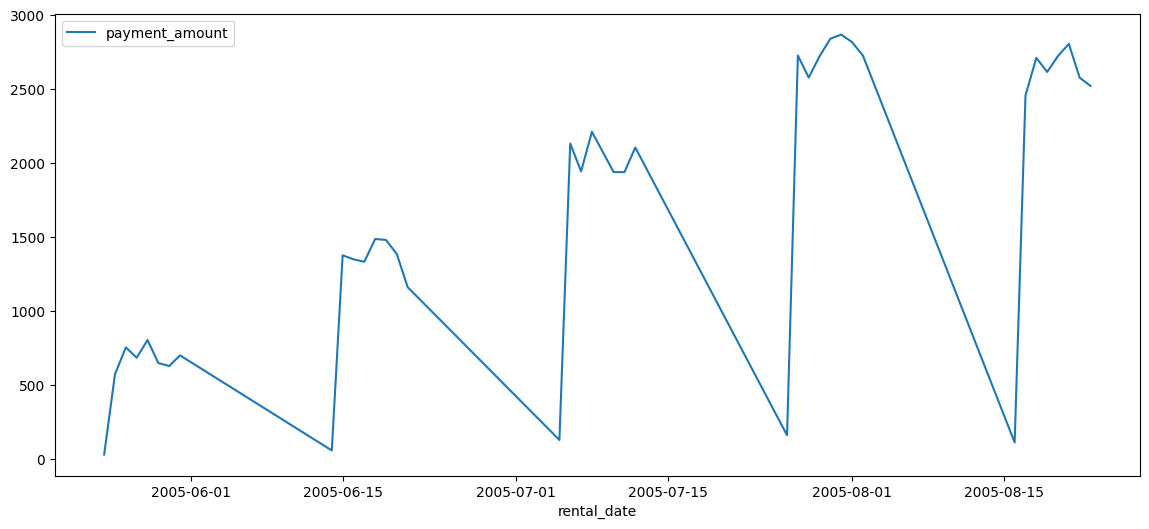

In [16]:
data[["rental_date", "payment_amount"]].groupby(["rental_date"]).sum().plot(figsize=(14,6))

The film rental market was growing cyclically that The number of rentals and the revenue increased every 3 weeks

# Explode data

In [17]:
data['real_rental_duration'] = data['return_date'] - data['rental_date']
data['real_rental_duration'] = data['real_rental_duration'].dt.days
data['real_rental_duration'].mean()

5.025219090851775

<Axes: ylabel='Frequency'>

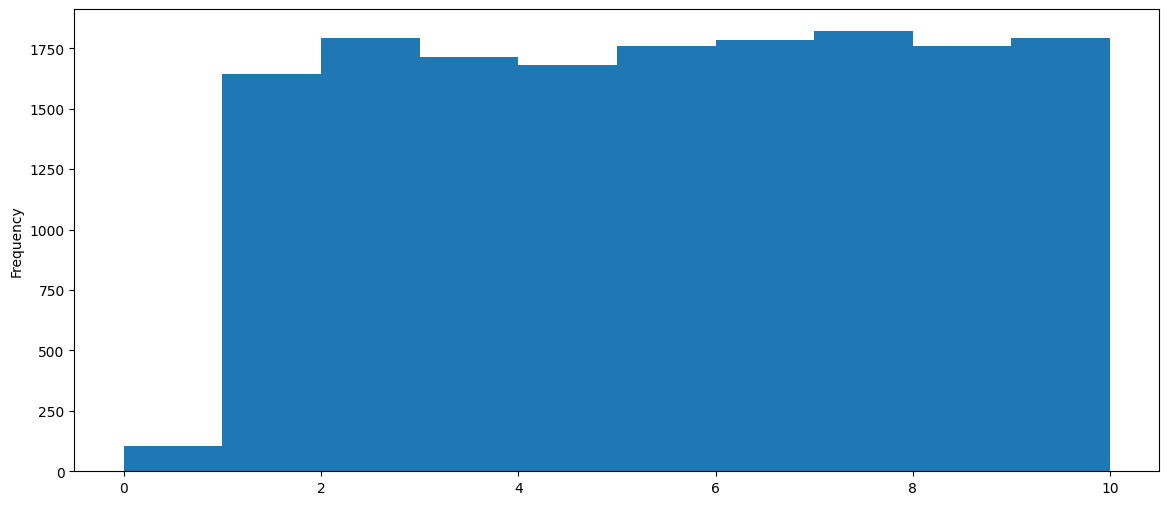

In [18]:
data['real_rental_duration'].plot(kind='hist',figsize=(14,6))

<Axes: >

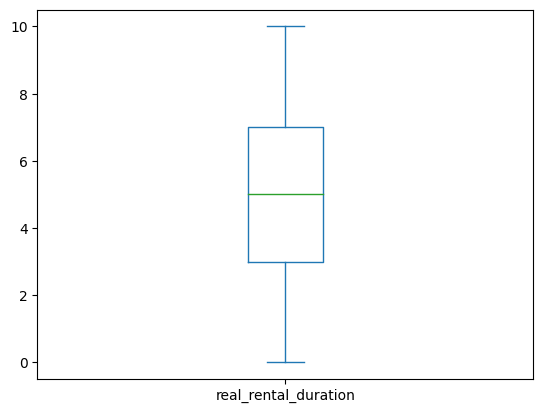

In [19]:
data['real_rental_duration'].plot(kind='box')

In [20]:
data['rental_store_city'].value_counts()

Woodridge     8030
Lethbridge    7831
Name: rental_store_city, dtype: int64

<Axes: xlabel='rental_store_city'>

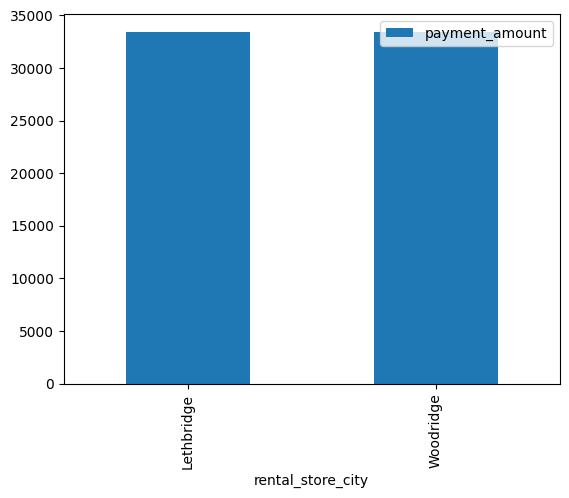

In [21]:
data[['rental_store_city','payment_amount']].groupby(['rental_store_city']).sum().plot(kind='bar')

In [22]:
data_Woodridge = data[data['rental_store_city'] == 'Woodridge']
data_Lethbridge = data[data['rental_store_city'] == 'Lethbridge']

Text(0.5, 1.0, 'Lethbridge')

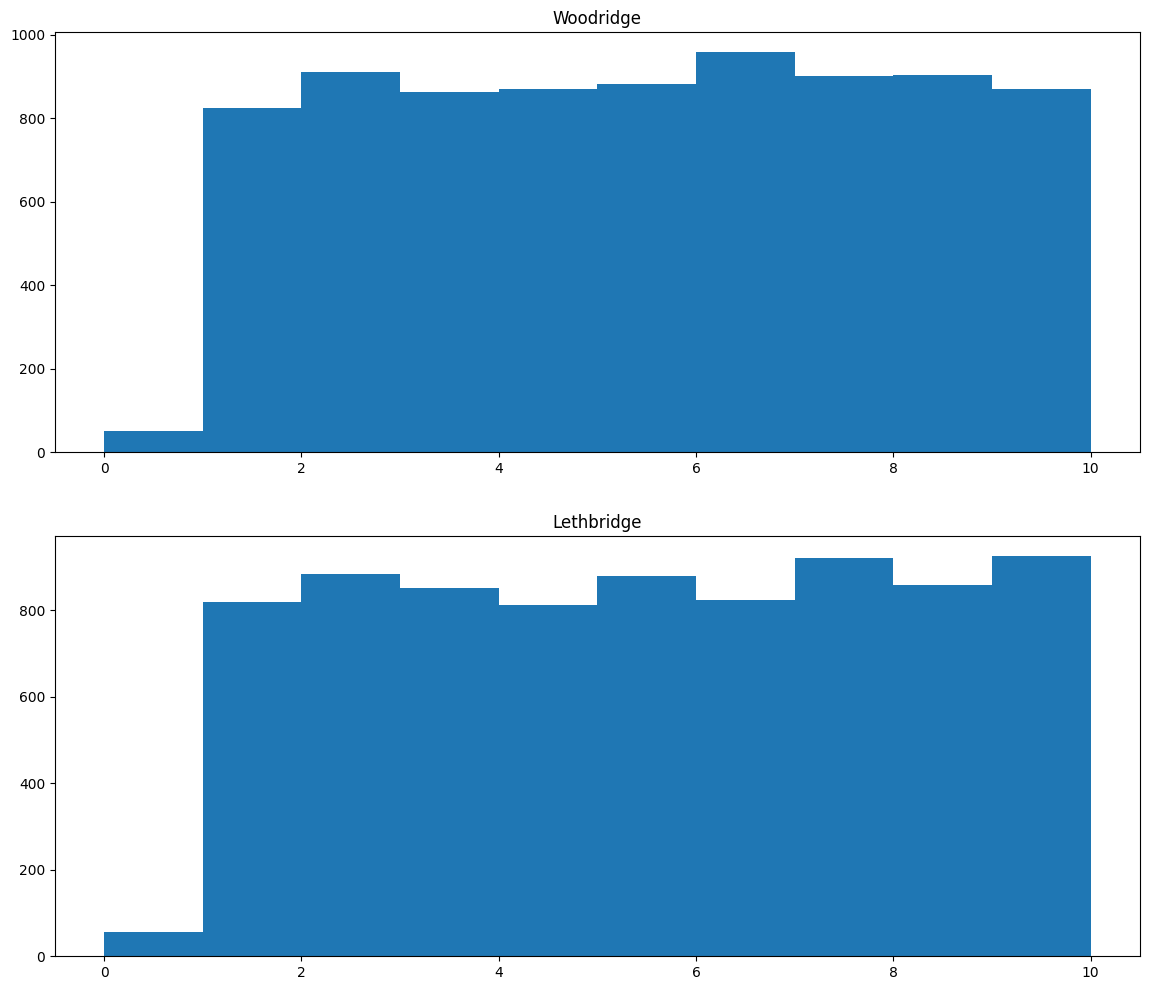

In [23]:
fig, axs = plt.subplots(2,1, figsize=(14,12))


axs[0].hist(data_Woodridge['real_rental_duration'])
axs[0].set_title('Woodridge')
axs[1].hist(data_Lethbridge['real_rental_duration'])
axs[1].set_title('Lethbridge')


Customers usually get film rentals for at least 2 and at most 10 days and 5 days in average. It's the same with the market of Woodbridge and Lethbridge.

In [24]:
data['category'].value_counts()

Sports         1164
Animation      1145
Action         1095
Sci-Fi         1093
Family         1083
Drama          1053
Documentary    1043
Foreign        1022
Games           955
Children        939
Comedy          932
Classics        930
New             927
Horror          834
Travel          827
Music           819
Name: category, dtype: int64

<Axes: >

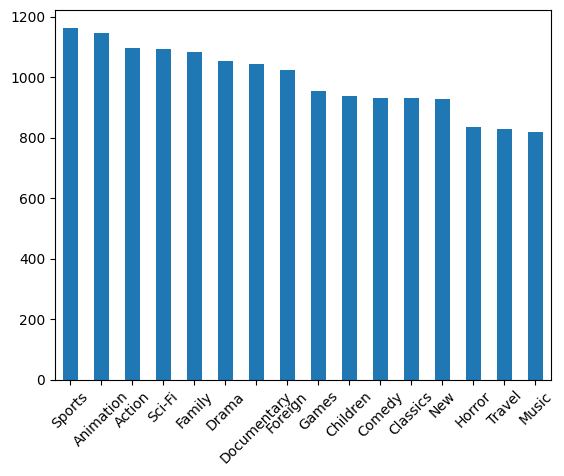

In [33]:
data['category'].value_counts().plot(kind='bar', rot=45)

<Axes: title={'center': 'Woodridge'}, xlabel='Film Category'>

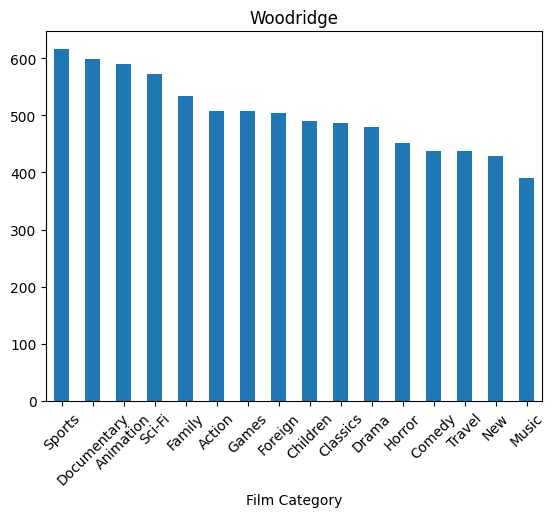

In [36]:
data_Woodridge['category'].value_counts().plot(kind = 'bar', title = 'Woodridge', rot=45, xlabel = "Film Category")

<Axes: title={'center': 'Lethbridge'}, xlabel='Film Category'>

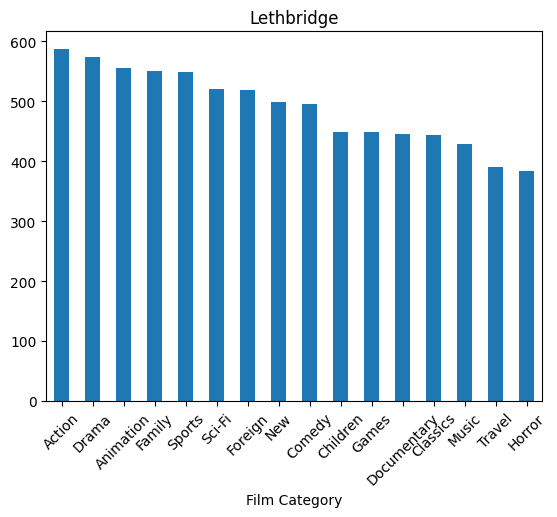

In [35]:
data_Lethbridge['category'].value_counts().plot(kind = 'bar', title = 'Lethbridge', rot=45, xlabel = "Film Category")

The customers of Woodridge and Lathbridge got the different film tatses. Top 5 favorite film category of Woodridge's rental market are Sports, Documentary, Animation, Sci-fi and Family and meanwhile there are Action, Drama, Animation, Family and Sports in Lethbridge.